## Yo this notebook is lit

In [1]:
import pandas as pd
import numpy as np
#from skimage.io import imshow
from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train_labels = [class_labels[int(val)] for val in y_train]
h = 32
w = 32

X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train - 1/2
X_test = X_test - 1/2

# Takes only the classes we are concerned with 
sub_sample = [1, 4, 9]
X_sub_train = []
y_sub_train = []
for i in range(0,len(y_train)):
    if y_train[i][0] in sub_sample:
        X_sub_train.append(X_train[i])
        if y_train[i][0] == 1 or y_train[i][0] == 9:
            y_sub_train.append([0])
        if y_train[i][0] == 4:
            y_sub_train.append([1])

        
X_sub_test = []
y_sub_test = []
for i in range(0,len(y_test)):
    if y_test[i][0] in sub_sample:
        X_sub_test.append(X_test[i])
        # If it's a truck or automobile
        if y_test[i][0] == 1 or y_test[i][0] == 9:
            y_sub_test.append([0])
        # If it's a deer
        if y_test[i][0] == 4:
            y_sub_test.append([1])

X_sub_train = np.array(X_sub_train)
X_sub_test = np.array(X_sub_test)
y_sub_train = np.array(y_sub_train)
y_sub_test = np.array(y_sub_test)
        
sub_class_labels = ['automobile', 'deer']
y_sub_train_labels = [sub_class_labels[int(val)] for val in y_sub_train]

NUM_CLASSES = len(sub_class_labels)
y_sub_train_ohe = keras.utils.to_categorical(y_sub_train, NUM_CLASSES)
y_sub_test_ohe = keras.utils.to_categorical(y_sub_test, NUM_CLASSES)

Using TensorFlow backend.


In [3]:
#print(X_sub_train)
#print(X_train)

In [4]:
#imshow(X_sub_train[0].squeeze())

In [5]:
print(len(X_sub_train))
print(len(y_sub_train))
print(len(X_sub_test))
print(len(y_sub_test))

15000
15000
3000
3000


In [6]:
#X_c = np.concatenate([X_train,X_test], axis=0)
#y_c = np.concatenate([y_train,y_test], axis=0).flatten()
#vectorized_color = np.reshape(X_c,(len(X_c),32*32,3))
#color_pixels = np.reshape(vectorized_color,(len(vectorized_color)*32*32,3))

In [7]:
#bw_pixels = [(0.21*pixel[0])+(0.72*pixel[1])+(0.07*pixel[2]) for pixel in color_pixels]#convert rgb to b/w
#vectorized_bw = np.reshape(bw_pixels,(len(X),32*32))#reconstruct to list in image vectors
#vectorized_bw.dump("data/vectorized_bw")

In [8]:
'''vectorized_bw_all = np.load("data/vectorized_bw")
print(vectorized_bw_all.shape)

#we might need these DF's later
df_bw = pd.DataFrame(data=vectorized_bw_all)
df_bw = df_bw.assign(y=pd.Series(y,name='y'))
#df_bw_sample = df_bw.sample(5000)
X = df_bw.drop('y', axis=1).as_matrix()
y = df_bw.y.as_matrix()
print(X.shape)
print(y.shape)'''
#now, we can do cv or a train test split

'vectorized_bw_all = np.load("data/vectorized_bw")\nprint(vectorized_bw_all.shape)\n\n#we might need these DF\'s later\ndf_bw = pd.DataFrame(data=vectorized_bw_all)\ndf_bw = df_bw.assign(y=pd.Series(y,name=\'y\'))\n#df_bw_sample = df_bw.sample(5000)\nX = df_bw.drop(\'y\', axis=1).as_matrix()\ny = df_bw.y.as_matrix()\nprint(X.shape)\nprint(y.shape)'

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

## CNN #1 

In [ ]:
%%time

from keras.layers import average 
from keras.models import Input, Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

input_holder = Input(shape=(w, h, 3))
conv1 = Conv2D(filters=32,
               input_shape = (w,h,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')(input_holder)

max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)

conv2 = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')(max1)

max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)


# add one layer on flattened output
drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
flat1 = Flatten()(drop1)
dense1 = Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(flat1)
drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
dense2_1 = Dense(NUM_CLASSES, 
              activation='sigmoid', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(drop2)

cnn1 = Model(inputs=input_holder,outputs=dense2_1)

# Let's train the model 
cnn1.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn1.fit(X_sub_train, y_sub_train_ohe,
                      #steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
yhat_cnn = np.argmax(cnn1.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

## CNN #1 with Data Expansion

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

In [ ]:
cnn1_de = Model(inputs=input_holder,outputs=dense2_1)

# Let's train the model 
cnn1_de.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

datagen.fit(X_sub_train)
cnn1_de.fit_generator(datagen.flow(X_sub_train, y_sub_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
yhat_cnn = np.argmax(cnn1_de.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

## CNN #2: LeNet5

In [ ]:
from keras.layers.normalization import BatchNormalization

l2_lambda = 0.0001
input_holder = Input(shape=(w, h, 3))

conv1 = Conv2D(filters=6,kernel_size=(5,5),
               input_shape = (img_wh,img_wh,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda))(input_holder)
max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)
batch1 = BatchNormalization()(max1)
activ1 = Activation("sigmoid")(batch1)

conv2 = Conv2D(filters=16,kernel_size=(5,5), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda))(activ1)
max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)
batch2 = BatchNormalization()(max2)
activ2 = Activation("sigmoid")(batch2)

conv3 = Conv2D(filters=120,kernel_size=(1,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda))(activ2)


# add one layer on flattened output
#drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
flat1 = Flatten()(conv3)
dense1 = Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(flat1)
drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
dense2_2 = Dense(NUM_CLASSES, 
              activation='sigmoid', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(drop2)

In [ ]:
cnn2 = Model(inputs=input_holder,outputs=dense2_2)

# Let's train the model 
cnn2.compile(loss=w_categorical_crossentropy, # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn2.fit(X_sub_train, y_sub_train_ohe,
                      #steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
yhat_cnn = np.argmax(cnn2.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

## CNN #2: LeNet5 with Data Expansion

In [12]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

In [ ]:
cnn2_de = Model(inputs=input_holder,outputs=dense2_2)

# Let's train the model 
cnn2_de.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

datagen.fit(X_sub_train)
cnn2_de.fit_generator(datagen.flow(X_sub_train, y_sub_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
yhat_cnn = np.argmax(cnn2_de.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

## CNN #1 Ensemble

In [ ]:
%%time

from keras.layers import average 
from keras.models import Input, Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

num_ensembles = 5

input_holder = Input(shape=(w, h, 3))

branches = []
for _ in range(num_ensembles):

    conv1 = Conv2D(filters=32,
                   input_shape = (w,h,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(input_holder)
    
    max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)

    conv2 = Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(max1)
    
    max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)


    # add one layer on flattened output
    drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
    flat1 = Flatten()(drop1)
    dense1 = Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(flat1)
    drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
    dense2 = Dense(NUM_CLASSES, 
                  activation='sigmoid', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(drop2)
    
    # now add this branch onto the master list
    branches.append(dense2)

# that's it, we just need to average the results
ave1 = average(branches)

# here is the secret sauce for setting the network using the 
#   Model API:
cnn_ens1 = Model(inputs=input_holder,outputs=ave1)

# Let's train the model 
cnn_ens1.compile(loss=w_categorical_crossentropy, # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn_ens1.fit_generator(datagen.flow(X_sub_train, y_sub_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

In [ ]:
yhat_cnn = np.argmax(cnn_ens1.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

In [ ]:
yhat_cnn = np.argmax(cnn1.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

# OKAY BOIS WE JUST TRYNA GET THAT CROSS VALIDATION WORKIN

In [28]:
from sklearn.model_selection import KFold
import sklearn.metrics as mt
from numpy import interp
from sklearn.metrics import roc_curve, auc
l2_lambda = 0.0001

#####Locus######
mlp_roc_auc = []
cnn_roc_auc = []
mean_tpr_mlp = 0.0
mean_fpr_mlp = np.linspace(0, 1, 100)
mean_tpr_cnn = 0.0
mean_fpr_cnn = np.linspace(0, 1, 100)
#####Locus######

num_folds = 2 #Locus
model_list1 = []
yhat_list1 = []
y_test_list1 = []

skf = KFold(n_splits=num_folds).split(X_sub_train, y_sub_train_ohe)
for k, (train_indices, test_indices) in enumerate(skf):
    cv_X_train = np.array(X_sub_train[train_indices])
    cv_y_train = np.array(y_sub_train[train_indices])
    cv_y_train_ohe = np.array(y_sub_train_ohe[train_indices])
    
    cv_X_test = np.array(X_sub_train[test_indices])
    cv_y_test = np.array(y_sub_train[test_indices])
    cv_y_test_ohe = np.array(y_sub_train_ohe[test_indices])
    
    
    input_holder = Input(shape=(w, h, 3))
    conv1 = Conv2D(filters=32,
                   input_shape = (w,h,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(input_holder)

    max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)

    conv2 = Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(max1)

    max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)


    # add one layer on flattened output
    drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
    flat1 = Flatten()(drop1)
    dense1 = Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(flat1)
    drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
    dense2_1 = Dense(2, 
                  activation='sigmoid', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(drop2)
    cnn1_de = Model(inputs=input_holder,outputs=dense2_1)

    # Let's train the model 
    cnn1_de.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                    optimizer='rmsprop', # 'adadelta' 'rmsprop'
                    metrics=['accuracy'])
    datagen.fit(cv_X_train)
    cnn1_de.fit_generator(datagen.flow(cv_X_train, cv_y_train_ohe, batch_size=128), 
                          steps_per_epoch=int(len(cv_X_train)/128), # how many generators to go through per epoch
                          epochs=2, verbose=1,
                          validation_data=(cv_X_test, cv_y_test_ohe)
                          #callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                         )
    
    yhat = np.argmax(cnn1_de.predict(cv_X_test), axis=1)
    rec_cnn = mt.recall_score(cv_y_test,yhat)
    acc_cnn = mt.accuracy_score(cv_y_test,yhat)
    print("Recall: ", rec_cnn)
    print("Accuracy: ", acc_cnn)
    print("-----------------------")
    model_list1.append(cnn1_de)
    yhat_list1.append(yhat)
    y_test_list1.append(cv_y_test)
    
    
    #####Locus######
    probs_cnn = list(cnn1_de.predict(cv_X_test))
    probs_cnn = np.array(probs_cnn)[:,1]
    fpr_cnn, tpr_cnn, _ = roc_curve(cv_y_test, probs_cnn)
    cnn_roc_auc.append((fpr_cnn, tpr_cnn, auc(fpr_cnn, tpr_cnn)))
    mean_tpr_cnn += interp(mean_fpr_cnn, fpr_cnn, tpr_cnn)
    mean_tpr_cnn[0] = 0.0   

# TODO: uncomment when we add the MLP
#     probs_mlp = mlp.predict_proba(X_test_mlp)
#     probs_mlp = np.array(probs_mlp)[:,1]
#     fpr_mlp, tpr_mlp, _ = roc_curve(y_test, probs_mlp)
#     mlp_roc_auc.append((fpr_mlp, tpr_mlp, auc(fpr_mlp, tpr_mlp)))
#     mean_tpr_mlp  += interp(mean_fpr_mlp, fpr_mlp, tpr_mlp)
#     mean_tpr_mlp [0] = 0.0

Epoch 1/2
58/58 [==============================] - 9s - loss: 0.4378 - acc: 0.8244 - val_loss: 0.2915 - val_acc: 0.8901
Epoch 2/2
58/58 [==============================] - 9s - loss: 0.3059 - acc: 0.8873 - val_loss: 0.2411 - val_acc: 0.9083
Recall:  0.760625501203
Accuracy:  0.9088
-----------------------
Epoch 1/2
58/58 [==============================] - 9s - loss: 0.5115 - acc: 0.7808 - val_loss: 0.3229 - val_acc: 0.8858
Epoch 2/2
58/58 [==============================] - 8s - loss: 0.3518 - acc: 0.8663 - val_loss: 0.2459 - val_acc: 0.9173
Recall:  0.852354349561
Accuracy:  0.917866666667
-----------------------


In [31]:
# TODO: uncomment when we add the MLP
# mean_tpr_mlp /= n_splits
# mean_tpr_mlp[-1] = 1.0
# mean_auc_mlp = auc(mean_fpr_mlp, mean_tpr_mlp)

mean_tpr_cnn /= num_folds
mean_tpr_cnn[-1] = 1.0
mean_auc_cnn = auc(mean_fpr_cnn, mean_tpr_cnn)

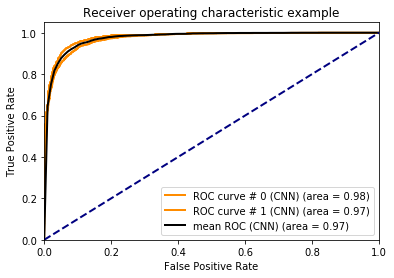

In [32]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
i = 0
for fpr, tpr, auc_ in cnn_roc_auc:
        plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve # %d (CNN) (area = %0.2f)' % (i, auc_))
        i += 1
# TODO: uncomment when we add the MLP
# for fpr, tpr, auc_ in mlp_roc_auc:
#         plt.plot(fpr, tpr, color='green',
#              lw=lw, label='ROC curve # %d (MLP) (area = %0.2f)' % (i, auc_))
#         i += 1        
        
# plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'k--', label='mean ROC (MLP) (area = %0.2f)' % mean_auc_mlp, lw=2)
plt.plot(mean_fpr_cnn, mean_tpr_cnn, 'k-', label='mean ROC (CNN) (area = %0.2f)' % mean_auc_cnn, lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## "Luke's" loss function

In [ ]:
from keras import backend as K
import functools
from itertools import product
import tensorflow as tf
weights=np.array([[1,0],[-1,1]])
def w_categorical_crossentropy(y_true, y_pred):
    nb_cl = len(weights)
    final_mask = K.zeros_like(y_pred[:, 0])
    y_pred_max = K.max(y_pred, axis=1)
    y_pred_max = tf.expand_dims(y_pred_max, 1)
    y_pred_max_mat = K.equal(y_pred, y_pred_max)
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):

        final_mask += (K.cast(weights[c_t, c_p],K.floatx()) * K.cast(y_pred_max_mat[:, c_p] ,K.floatx())* K.cast(y_true[:, c_t],K.floatx()))
    return K.categorical_crossentropy(y_pred, y_true) * final_mask

In [ ]:
%%time

from keras.layers import average 
from keras.models import Input, Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

num_ensembles = 5

input_holder = Input(shape=(w, h, 3))

branches = []
for _ in range(num_ensembles):

    conv1 = Conv2D(filters=32,
                   input_shape = (w,h,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(input_holder)
    
    max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)

    conv2 = Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(max1)
    
    max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)


    # add one layer on flattened output
    drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
    flat1 = Flatten()(drop1)
    dense1 = Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(flat1)
    drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
    dense2 = Dense(NUM_CLASSES, 
                  activation='sigmoid', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(drop2)
    
    # now add this branch onto the master list
    branches.append(dense2)

# that's it, we just need to average the results
ave = average(branches)

# here is the secret sauce for setting the network using the 
#   Model API:
cnn_ens2 = Model(inputs=input_holder,outputs=ave)

# Let's train the model 
cnn_ens2.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn_ens2.fit_generator(datagen.flow(X_sub_train, y_sub_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
from sklearn import metrics as mt
yhat_cnn = np.argmax(cnn_ens.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

In [ ]:
yhat_cnn = np.argmax(cnn_ens2.predict(X_sub_test), axis=1)
rec_cnn = mt.recall_score(y_sub_test,yhat_cnn)
acc_cnn = mt.accuracy_score(y_sub_test,yhat_cnn)
print("Recall: ", rec_cnn)
print("Accuracy: ", acc_cnn)

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(cnn2_de).create(prog='dot', format='svg'))

In [ ]:
from keras.layers.normalization import BatchNormalization
l2_lambda = 0.0001

num_ensembles = 10
input_holder = Input(shape=(w, h, 3))
branches_le5 = []
for _ in range(num_ensembles):
    conv1 = Conv2D(filters=6,kernel_size=(5,5),
                   input_shape = (img_wh,img_wh,1), 
                   padding='valid', 
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda))(input_holder)
    max1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)
    batch1 = BatchNormalization()(max1)
    activ1 = Activation("sigmoid")(batch1)

    conv2 = Conv2D(filters=16,kernel_size=(5,5), 
                   padding='valid', 
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda))(activ1)
    max2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)
    batch2 = BatchNormalization()(max2)
    activ2 = Activation("sigmoid")(batch2)

    conv3 = Conv2D(filters=120,kernel_size=(1,1), 
                   padding='valid', 
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda))(activ2)


    # add one layer on flattened output
    #drop1 = Dropout(0.25)(max2) # add some dropout for regularization after conv layers
    flat1 = Flatten()(conv3)
    dense1 = Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(flat1)
    drop2 = Dropout(0.5)(dense1) # add some dropout for regularization, again!
    dense2 = Dense(NUM_CLASSES, 
                  activation='sigmoid', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(drop2)
    branches_le5.append(dense2)

# that's it, we just need to average the results
ave_le5 = average(branches_le5)   


cnn_le5 = Model(inputs=input_holder,outputs=ave_le5)

# Let's train the model 
cnn_le5.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn_le5.fit_generator(datagen.flow(X_sub_train, y_sub_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_sub_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_sub_test,y_sub_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001
img_wh = 32

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn = Sequential()

cnn.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn.fit_generator(datagen.flow(X_subtrain, y_train_ohe, batch_size=128), 
                  steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                  epochs=50, verbose=1,
                  validation_data=(X_sub_test,y_test_ohe),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                 )